In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("Used_Bikes.csv")

## EDA & Feature Engenering

In [3]:
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
data.tail()

,bike_name,price,city,kms_driven,owner,age,power,brand
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero
32647,Bajaj Pulsar 150cc,22000.0,Pune,60857.0,First Owner,13.0,150.0,Bajaj


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [6]:
# Check Null Values in Data
data.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [7]:
# check Duplicet Values
data.duplicated().sum()

25324

In [8]:
# Drop Duplicet values
data.drop_duplicates(inplace=True)

In [9]:
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['bike_name', 'city', 'owner', 'brand'], dtype='object')
Index(['price', 'kms_driven', 'age', 'power'], dtype='object')


In [10]:
# check all unique values in catigorical data
for i in catigorical_features:
    print(i,data[i].unique())

bike_name ['TVS Star City Plus Dual Tone 110cc' 'Royal Enfield Classic 350cc'
 'Triumph Daytona 675R' 'TVS Apache RTR 180cc'
 'Yamaha FZ S V 2.0 150cc-Ltd. Edition' 'Yamaha FZs 150cc'
 'Honda CB Hornet 160R  ABS DLX' 'Hero Splendor Plus Self Alloy 100cc'
 'Royal Enfield Thunderbird X 350cc'
 'Royal Enfield Classic Desert Storm 500cc' 'Yamaha YZF-R15 2.0 150cc'
 'Yamaha FZ25 250cc' 'Bajaj Pulsar NS200' 'Bajaj Discover 100M'
 'Bajaj Discover 125M' 'Bajaj Pulsar NS200 ABS' 'Bajaj Pulsar RS200 ABS'
 'Suzuki Gixxer SF 150cc' 'Benelli 302R 300CC'
 'Hero Splendor iSmart Plus IBS 110cc'
 'Royal Enfield Classic Chrome 500cc' 'Yamaha FZ V 2.0 150cc'
 'Hero Super Splendor 125cc' 'Honda CBF Stunner 125cc'
 'Bajaj Pulsar 150cc' 'Honda X-Blade 160CC ABS' 'Bajaj Avenger 220cc'
 'KTM RC 390cc' 'Honda CB Unicorn 150cc' 'KTM Duke 200cc'
 'Honda CBR 150R 150cc' 'Royal Enfield Thunderbird X 500cc'
 'KTM RC 200cc ABS' 'Royal Enfield Thunderbird 350cc'
 'Royal Enfield Bullet Electra 350cc' 'Bajaj Avenger St

In [11]:
# check all unique values in catigorical data
for i in catigorical_features:
    print(i,data[i].value_counts())
    print("*"*80)

bike_name Royal Enfield Classic 350cc         358
Bajaj Pulsar 150cc                  265
Royal Enfield Thunderbird 350cc     237
Bajaj Avenger 220cc                 165
Hero Passion Pro 100cc              160
                                   ... 
Honda CB ShineSP 125cc CBS            1
BMW S 1000 XR Pro                     1
Honda CD 110 Dream DX                 1
Bajaj Pulsar 150cc Rear Disc ABS      1
Hero Hunk Rear Disc 150cc             1
Name: bike_name, Length: 471, dtype: int64
********************************************************************************
city Delhi             1426
Bangalore          683
Mumbai             609
Gurgaon            474
Faridabad          463
                  ... 
Muzaffarnagar        1
Calicut              1
Raigarh              1
Chikkaballapur       1
Sidhi                1
Name: city, Length: 443, dtype: int64
********************************************************************************
owner First Owner             6642
Second Owner  

<AxesSubplot:xlabel='bike_name', ylabel='price'>

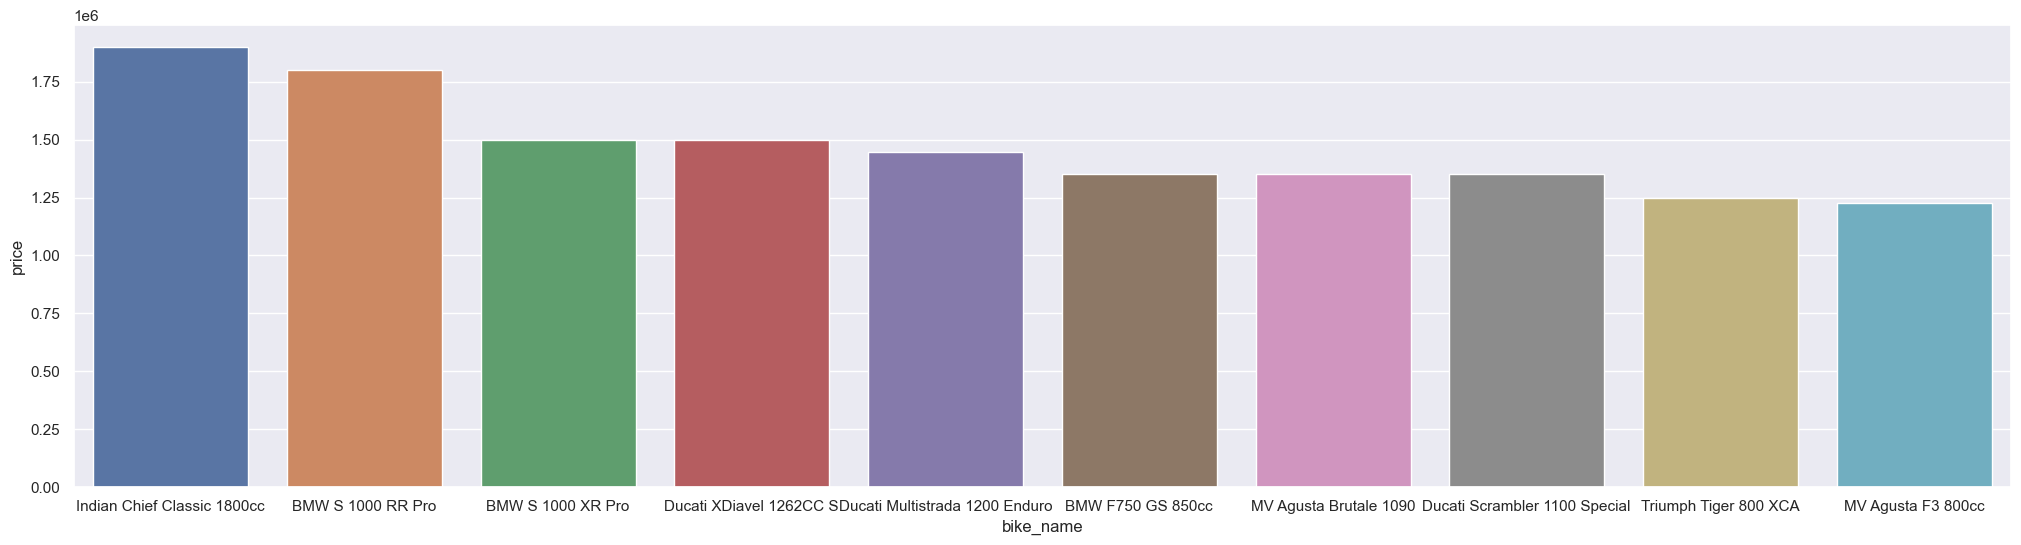

In [12]:
plt.figure(figsize=(25,6))
top_10_expensive_bikes = data.groupby("bike_name")["price"].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='bike_name',y='price',data=top_10_expensive_bikes)

<AxesSubplot:xlabel='city', ylabel='price'>

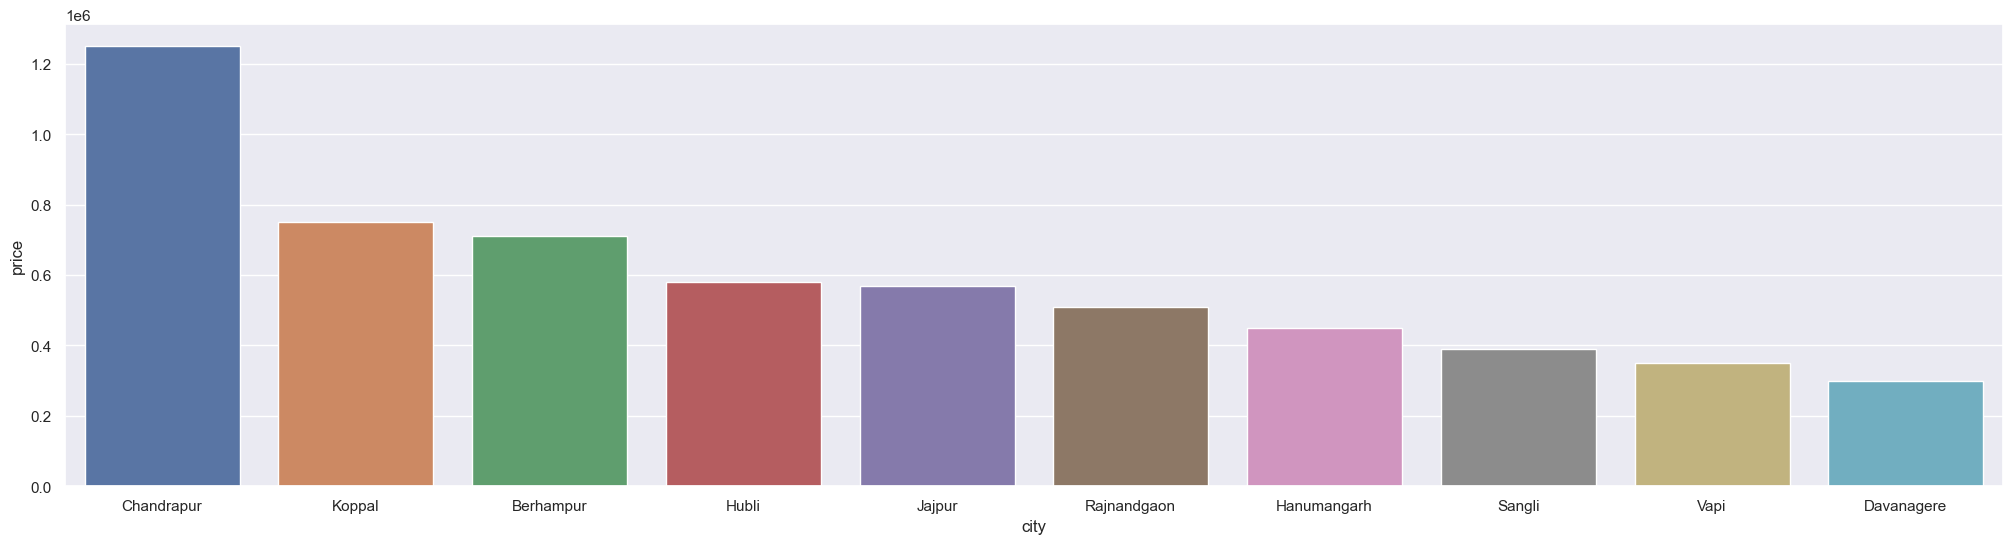

In [13]:
plt.figure(figsize=(25,6))
city = data.groupby("city")["price"].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='city',y='price',data=city)

<AxesSubplot:xlabel='brand', ylabel='price'>

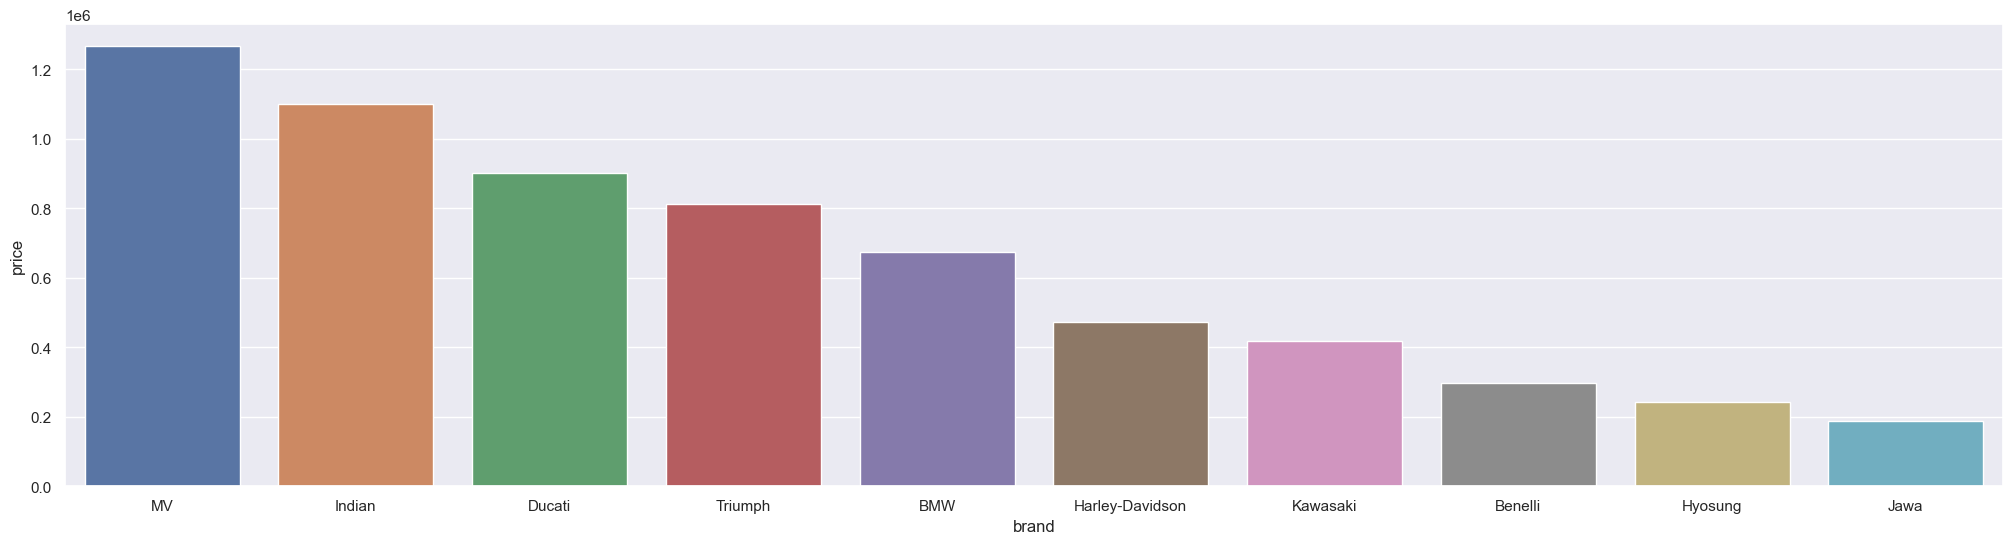

In [14]:
plt.figure(figsize=(25,6))
brand = data.groupby("brand")["price"].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='brand',y='price',data=brand)

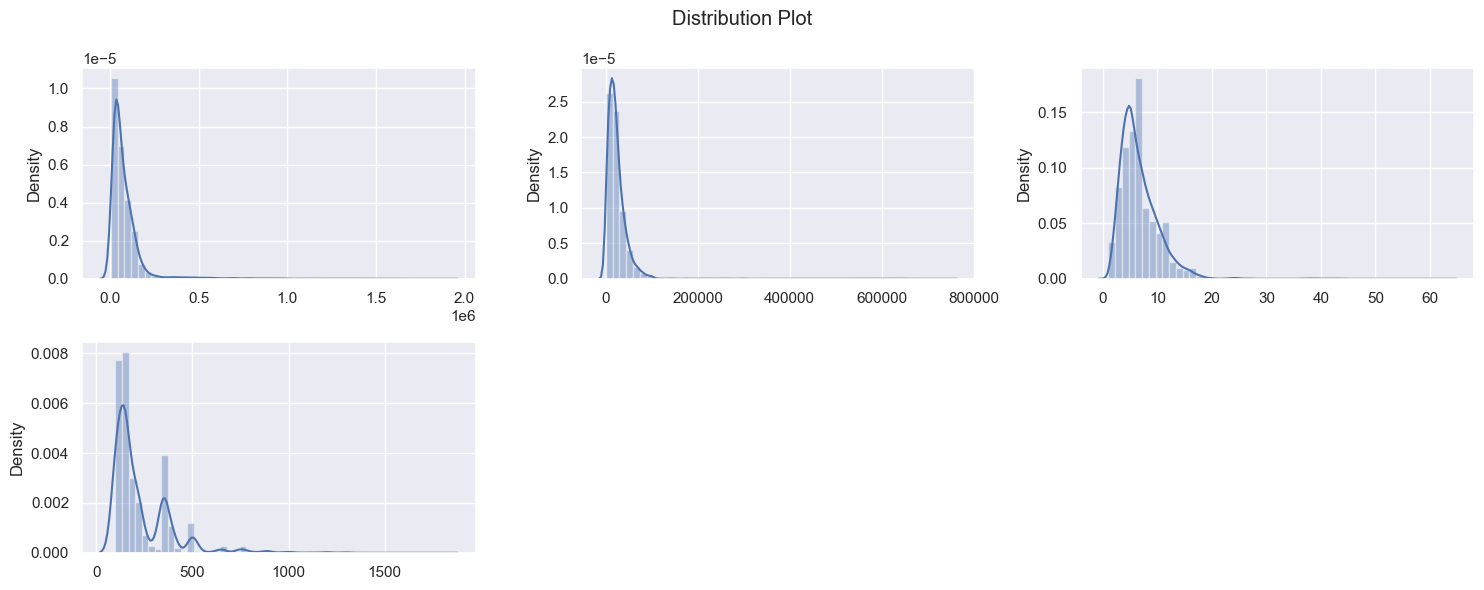

In [15]:
plt.suptitle("Distribution Plot")
for i in range(0,len(numerical_features)):
    plt.subplot(2,3,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.tight_layout()

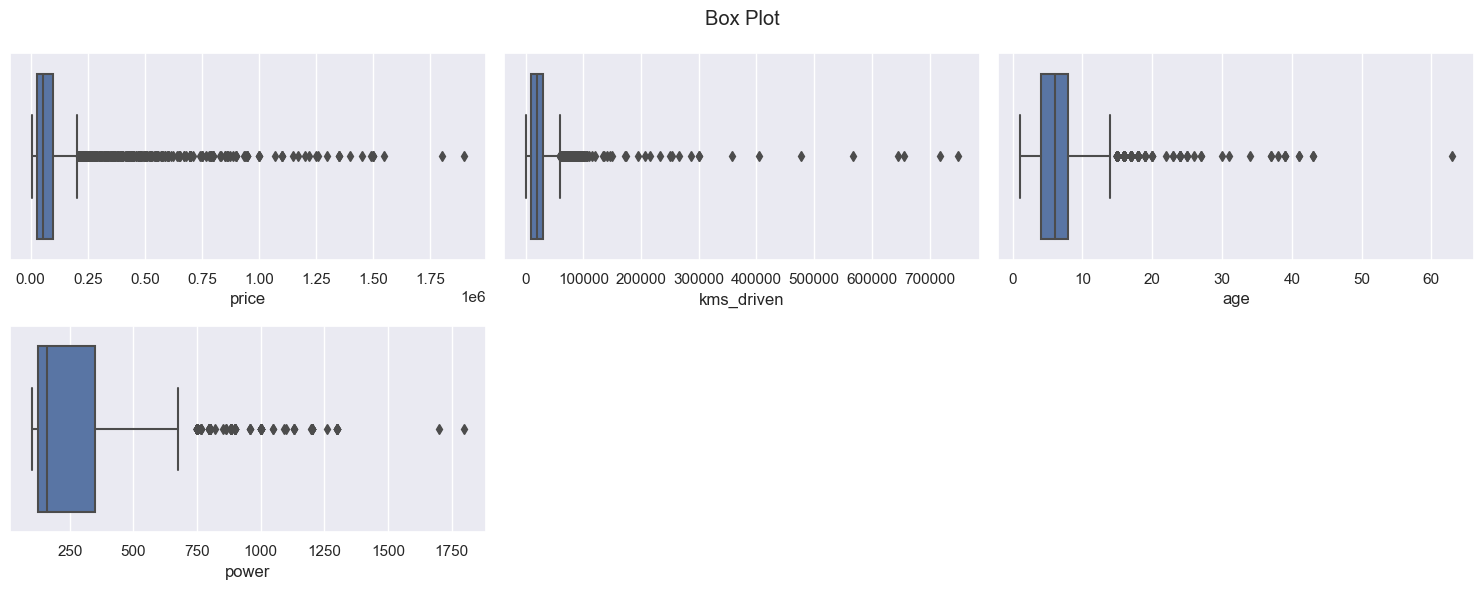

In [16]:
plt.suptitle("Box Plot")
for i in range(0,len(numerical_features)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.tight_layout()

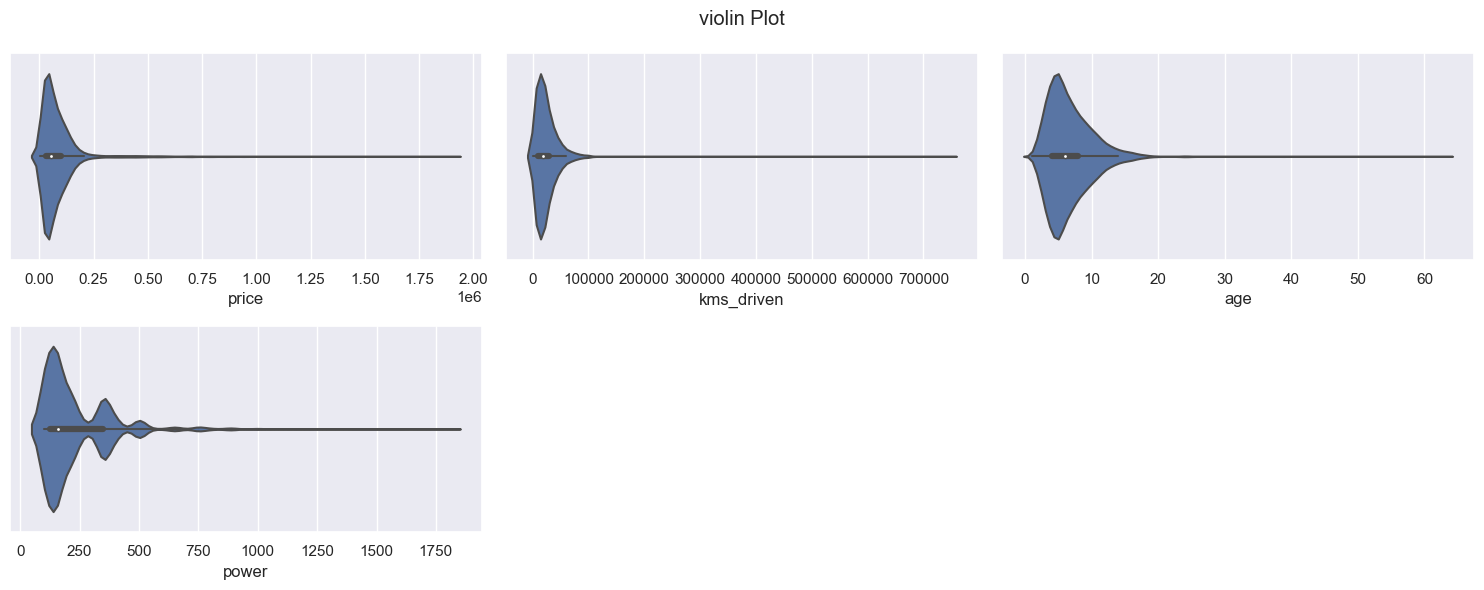

In [17]:
plt.suptitle("violin Plot")
for i in range(0,len(numerical_features)):
    plt.subplot(2,3,i+1)
    sns.violinplot(x=data[numerical_features[i]])
    plt.tight_layout()

In [18]:
data.describe()

,price,kms_driven,age,power
count,7.324000e+03,7324.000000,7324.000000,7324.000000
mean,8.488390e+04,23910.496587,6.656472,228.133397
std,1.209662e+05,27317.594631,3.605299,158.324219
min,4.400000e+03,1.000000,1.000000,100.000000
25%,3.000000e+04,10155.750000,4.000000,125.000000
50%,5.500000e+04,19000.000000,6.000000,160.000000
75%,1.000000e+05,30112.000000,8.000000,350.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [19]:
cato =["owner","brand"]
# use label encoding on catigorical data to convert in to numerical
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in cato:
     data[i] = lable.fit_transform(data[i])
data["Price"] = data["price"]

<AxesSubplot:>

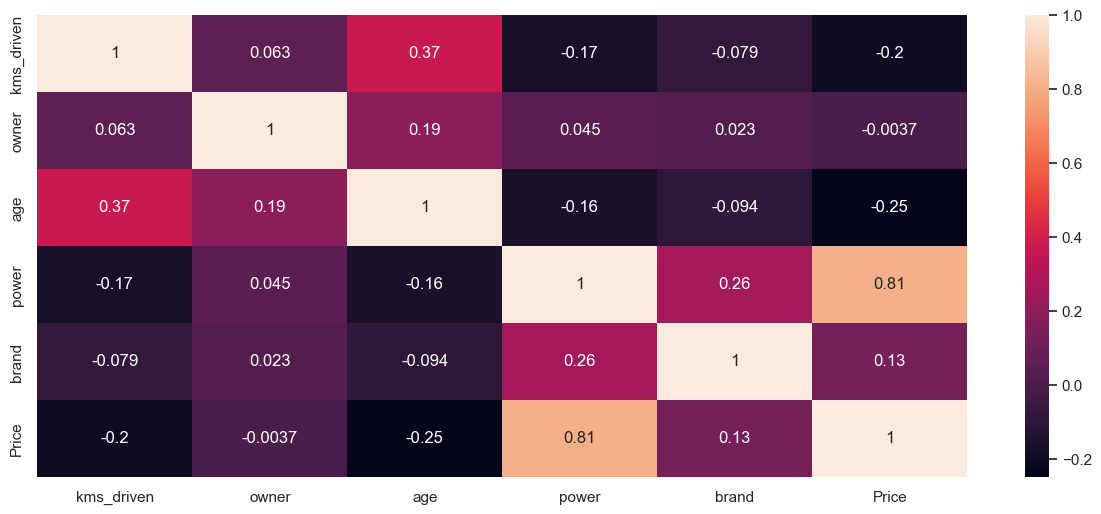

In [20]:
data.drop("price",axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True)

# Model Traning

In [21]:
data

,bike_name,city,kms_driven,owner,age,power,brand,Price
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,17654.0,0,3.0,110.0,19,35000.0
1,Royal Enfield Classic 350cc,Delhi,11000.0,0,4.0,350.0,17,119900.0
2,Triumph Daytona 675R,Delhi,110.0,0,8.0,675.0,20,600000.0
3,TVS Apache RTR 180cc,Bangalore,16329.0,0,4.0,180.0,19,65000.0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,10000.0,0,3.0,150.0,21,80000.0
...,...,...,...,...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,Delhi,48587.0,0,8.0,150.0,5,25000.0
9369,Bajaj Avenger 220cc,Bangalore,60000.0,0,9.0,220.0,1,35000.0
9370,Harley-Davidson Street 750 ABS,Jodhpur,3430.0,0,4.0,750.0,4,450000.0
9371,Bajaj Dominar 400 ABS,Hyderabad,21300.0,0,4.0,400.0,1,139000.0


In [22]:
x = data.drop("Price",axis=1)
y = data["Price"]

In [23]:
# Saprate numerical and catiogerical data
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['bike_name', 'city'], dtype='object')
Index(['kms_driven', 'owner', 'age', 'power', 'brand'], dtype='object')


In [24]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(sparse=False,handle_unknown="ignore")),
        ("scaler",StandardScaler(with_mean=False)),
    ]
)

# Creat Preprocessor obj
preprocessing = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features),
])

In [26]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5859, 7)
(5859,)
(1465, 7)
(1465,)


In [28]:
# Transform 
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [56]:
## Without Hyperameters
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor()
    
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    # Make Prediction
    y_predict = model.predict(X_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    trainig_score.append(score)

LinearRegression
Model Traning Performance
MSE 5.677401179102377e+37
MAE 3.8245957869224986e+18
RMSE 7.534853136659253e+19
R2 -2.9161660630213654e+27
Ridge
Model Traning Performance
MSE 537755788581.50836
MAE 1830554.5119786125
RMSE 7333183.405462517
R2 72.37846804578597
Lesso
Model Traning Performance
MSE 321401343628.36316
MAE 1652176.3768189864
RMSE 5669226.963425995
R2 83.49139577544024
Elastic
Model Traning Performance
MSE 662887373128.7156
MAE 2287179.2693111748
RMSE 8141789.56451661
R2 65.95115264641255
LinearSVR
Model Traning Performance
MSE 2462760654360.849
MAE 7212740.151325417
RMSE 15693185.318350283
R2 -26.49835400088596
DecisionTreeRegressor
Model Traning Performance
MSE 364329850712.16724
MAE 1691906.2457337885
RMSE 6035974.243750276
R2 81.28639648888719
RandomForestRegressor
Model Traning Performance
MSE 254963318191.7426
MAE 1388280.8189045994
RMSE 5049389.252095174
R2 86.903948613622
XGBRegressor
Model Traning Performance
MSE 199833231261.29465
MAE 1333181.2613987841


In [57]:
trainig_score

[0.964532022505,
 0.9649093887699798,
 0.9649093329499294,
 0.9056936458392089,
 -0.3216947005055848,
 0.9988027852721549,
 0.9859985326373815,
 0.9896848741648693]

Text(0, 0.5, 'Predictions')

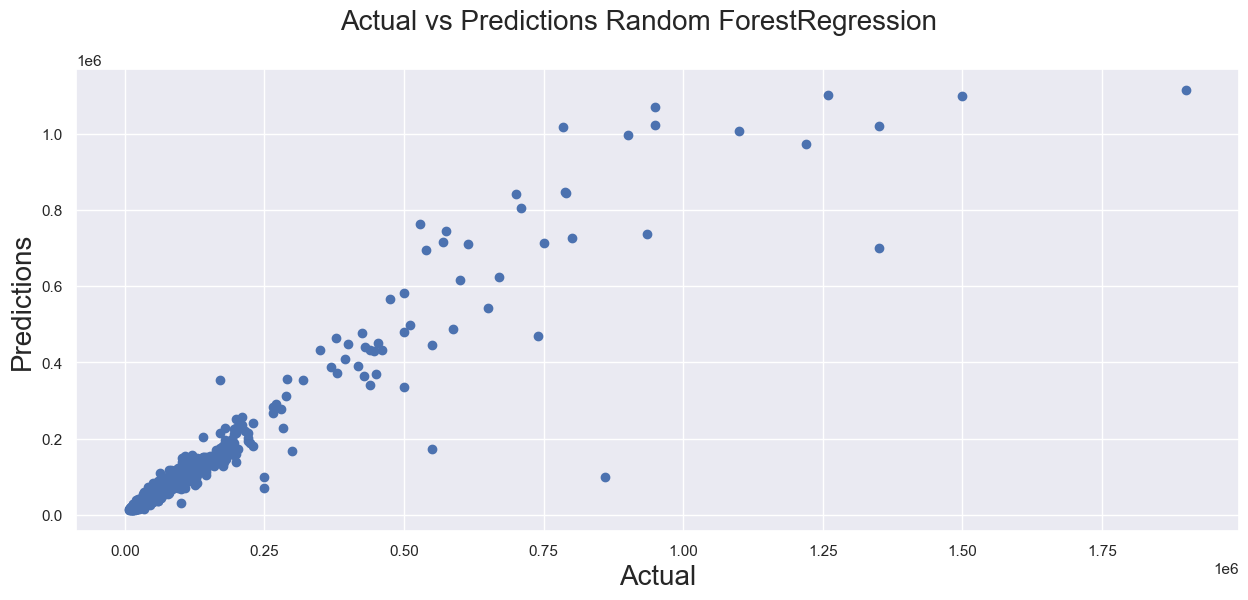

In [59]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict_list[7])
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=20)                          # X-label
plt.ylabel('Predictions', fontsize=20)

In [61]:
data.to_csv("Clean Used Bike Price Data.csv",index=False)